In [29]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Changing the current directory to the 'GitHub' sub-directory "MarineMammalSoundClassification" located in the 'My Drive' directory on Google Drive
%cd drive/My Drive/GitHub/MarineMammalSoundClassification/data/

[Errno 2] No such file or directory: 'drive/My Drive/GitHub/MarineMammalSoundClassification/data/'
/content/drive/My Drive/GitHub/MarineMammalSoundClassification/data


In [31]:
# Define the path
path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/data/'

In [32]:
# Import required libraries
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
print(os.listdir(path))

['AtlanticSpottedDolphin', 'BeardedSeal', 'Beluga_WhiteWhale', 'BottlenoseDolphin', 'BowheadWhale', 'ClymeneDolphin', 'CommonDolphin', 'FalseKillerWhale', "Fraser'sDolphin", "Grampus_Risso'sDolphin", 'HarpSeal', 'HumpbackWhale', 'KillerWhale', 'Long_FinnedPilotWhale', 'MelonHeadedWhale', 'Narwhal', 'NorthernRightWhale', 'PantropicalSpottedDolphin', 'RossSeal', 'Rough_ToothedDolphin', 'Short_Finned(Pacific)PilotWhale', 'SouthernRightWhale', 'SpermWhale', 'SpinnerDolphin', 'StripedDolphin', 'Walrus', 'White_beakedDolphin', 'White_sidedDolphin']


In [34]:
# Load each WAV in the data directory
directory = '//content/drive/My Drive/GitHub/MarineMammalSoundClassification/data'

# Dictionairies to hold audio data and class counts
class_audio = {}
class_counts = {}
sample_rates = {}
sample_durations = {}

# Lists to store summary data
audio_data_list = []
sample_rate_list = []
sample_duration_list = []

# Recursively iterate over all files in the directory and subdirectories
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.wav'):
            class_name = os.path.basename(root)
            filepath = os.path.join(root, filename)
            try:
                # Load the WAV file with the original sample rate
                audio_data, sample_rate = librosa.load(filepath, sr=None)

                # Compute file duration
                duration = len(audio_data) / sample_rate

                # Append audio data, sample rate, and sample duration to lists
                audio_data_list.append(audio_data)
                sample_rate_list.append(sample_rate)
                sample_duration_list.append(duration)

               # Append audio data, sample rate, and sample duration to the class dictionary
                if class_name not in class_audio:
                    class_audio[class_name] = []
                    sample_rates[class_name] = []
                    sample_durations[class_name] = []
                    class_counts[class_name] = 0
                class_audio[class_name].append((audio_data, sample_rate, duration))
                class_counts[class_name] += 1

                # Print information about the loaded file
                print("File:", filename)
                print("Class:", class_name)
                print("Sample Rate (Hz):", sample_rate)
                print("Duration (seconds):", duration)
                print("Shape of Audio Data:", audio_data.shape)
                print()
            except Exception as e:
                print(f"Error loading {filename}: {e}")

Streaming output truncated to the last 5000 lines.
Shape of Audio Data: (77439,)

File: 91012016.wav
Class: MelonHeadedWhale
Sample Rate (Hz): 81920
Duration (seconds): 1.36854248046875
Shape of Audio Data: (112111,)

File: 91012018.wav
Class: MelonHeadedWhale
Sample Rate (Hz): 81920
Duration (seconds): 0.94530029296875
Shape of Audio Data: (77439,)

File: 9101201C.wav
Class: MelonHeadedWhale
Sample Rate (Hz): 81920
Duration (seconds): 1.3715087890625
Shape of Audio Data: (112354,)

File: 9101201E.wav
Class: MelonHeadedWhale
Sample Rate (Hz): 81920
Duration (seconds): 0.60311279296875
Shape of Audio Data: (49407,)

File: 9101201F.wav
Class: MelonHeadedWhale
Sample Rate (Hz): 81920
Duration (seconds): 1.8547119140625
Shape of Audio Data: (151938,)

File: 9101201I.wav
Class: MelonHeadedWhale
Sample Rate (Hz): 81920
Duration (seconds): 0.96568603515625
Shape of Audio Data: (79109,)

File: 9101201L.wav
Class: MelonHeadedWhale
Sample Rate (Hz): 81920
Duration (seconds): 1.14310302734375
Sha

In [35]:
# Print summary statistics in a table format
# Create a DataFrame from the class counts
class_summary_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Number of Instances'])

# Calculate the total number of instances
total_instances = class_summary_df['Number of Instances'].sum()

# Calculate the total number of classes
total_classes = len(class_summary_df)

# Append these totals to the DataFrame
total_instances_df = pd.DataFrame([['Total Instances', total_instances]], columns=['Class', 'Number of Instances'])
total_classes_df = pd.DataFrame([['Total Classes', total_classes]], columns=['Class', 'Number of Instances'])
class_summary_df = pd.concat([class_summary_df, total_instances_df, total_classes_df], ignore_index=True)

# Display the DataFrame as styled table
class_summary_styled = class_summary_df.style.set_properties(**{'text-align': 'left'})
class_summary_styled.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

# Highlight the total rows
def highlight_totals(row):
    if 'Total' in row['Class']:
        return ['font-weight: bold; background-color: #00008B']*2  # Light blue background for total rows
    return ['']*2

class_summary_styled = class_summary_styled.apply(highlight_totals, axis=1)
class_summary_styled

,Class,Number of Instances
0,AtlanticSpottedDolphin,58
1,BeardedSeal,37
2,Beluga_WhiteWhale,50
3,BottlenoseDolphin,24
4,BowheadWhale,60
5,ClymeneDolphin,63
6,CommonDolphin,52
7,FalseKillerWhale,59
8,Fraser'sDolphin,87
9,Grampus_Risso'sDolphin,67


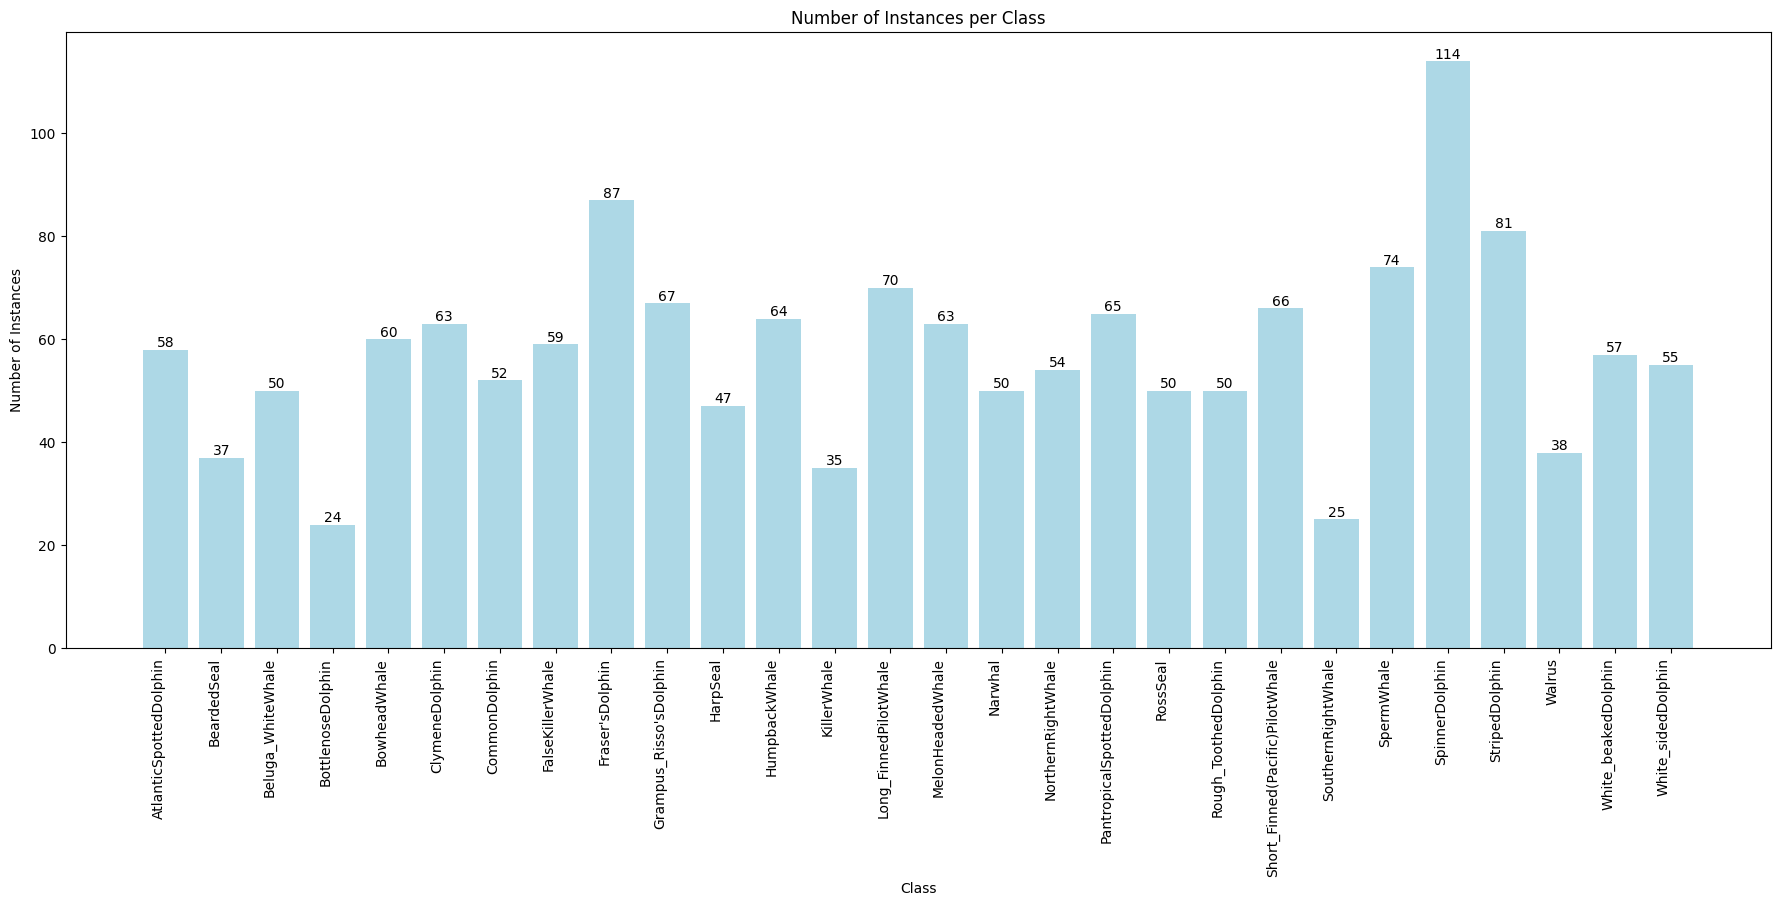

In [36]:
# Visualize the class distribution
plt.figure(figsize=(22, 8))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='lightblue')

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Class')
plt.xticks(rotation=90, ha="right")  # Rotate class labels for better visibility
plt.show()

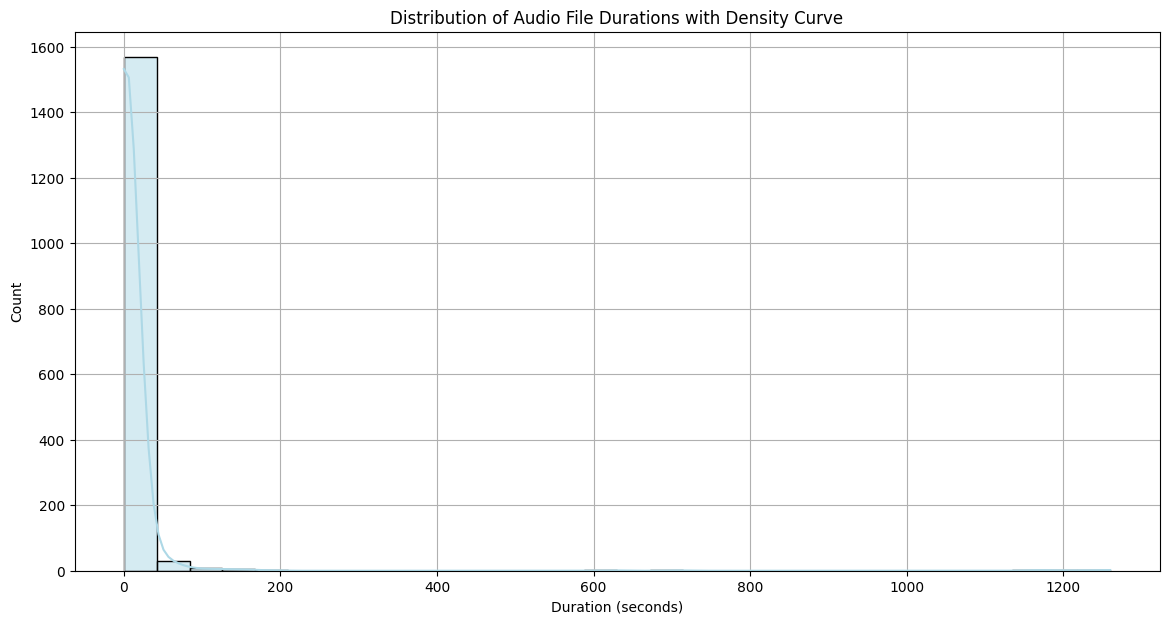

In [37]:
# Visualize the distribution of audio file durations (histogram with density curve)

plt.figure(figsize=(14, 7))
sns.histplot(sample_duration_list, kde=True, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Audio File Durations with Density Curve')
plt.grid(True)
plt.show()

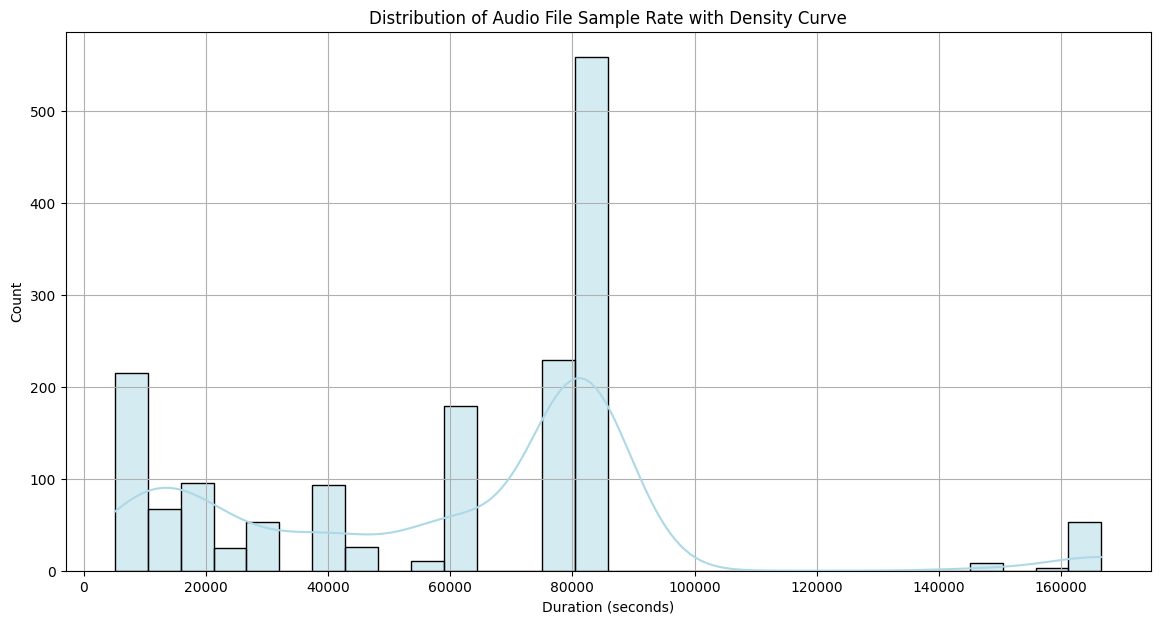

In [38]:
# Visualize the distribution of sample rates (histogram with density curve)

plt.figure(figsize=(14, 7))
sns.histplot(sample_rate_list, kde=True, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Audio File Sample Rate with Density Curve')
plt.grid(True)
plt.show()

In [52]:
# Create a dictionary to hold durations for each class
class_durations = {class_name: [] for class_name in class_audio.keys()}

# Populate the dictionary with durations
for class_name, audio_list in class_audio.items():
    for _, _, duration in audio_list:
        class_durations[class_name].append(duration)

# Function to compute specified statistics
def compute_statistics(data):
    return {
        'Min': np.min(data),
        '25%': np.percentile(data, 25),
        '50%': np.median(data),
        '75%': np.percentile(data, 75),
        'Max': np.max(data)
    }

# Compute the specified statistics for each class
summary_stats = {}
for class_name, durations in class_durations.items():
    summary_stats[class_name] = compute_statistics(durations)

# Convert the summary statistics dictionary to a DataFrame
summary_df = pd.DataFrame(summary_stats).transpose()
summary_df = summary_df.reset_index().rename(columns={'index': 'Class'})

# Apply a style to the DataFrame for visualization purposes
# Format only the numeric columns to two decimal places
numeric_columns = ['Min', '25%', '50%', '75%', 'Max']
styled_df = summary_df.style.format({col: "{:.2f}" for col in numeric_columns})  # Format numbers to two decimal places
styled_df = styled_df.background_gradient(cmap='Blues', subset=numeric_columns)  # Apply a gradient based on values

# Display the styled DataFrame
styled_df

,Class,Min,25%,50%,75%,Max
0,AtlanticSpottedDolphin,0.86,1.33,1.49,1.76,58.62
1,BeardedSeal,0.75,1.42,2.84,6.54,142.50
2,Beluga_WhiteWhale,0.52,1.39,2.10,3.77,8.73
3,BottlenoseDolphin,0.77,1.12,1.27,1.30,1.88
4,BowheadWhale,1.82,3.61,4.10,5.39,142.50
5,ClymeneDolphin,0.31,1.42,1.92,2.58,24.11
6,CommonDolphin,0.22,1.14,1.85,2.42,53.05
7,FalseKillerWhale,0.29,0.61,0.90,1.29,5.77
8,Fraser'sDolphin,0.34,0.94,1.89,3.78,32.76
9,Grampus_Risso'sDolphin,0.25,0.41,0.61,2.29,35.62


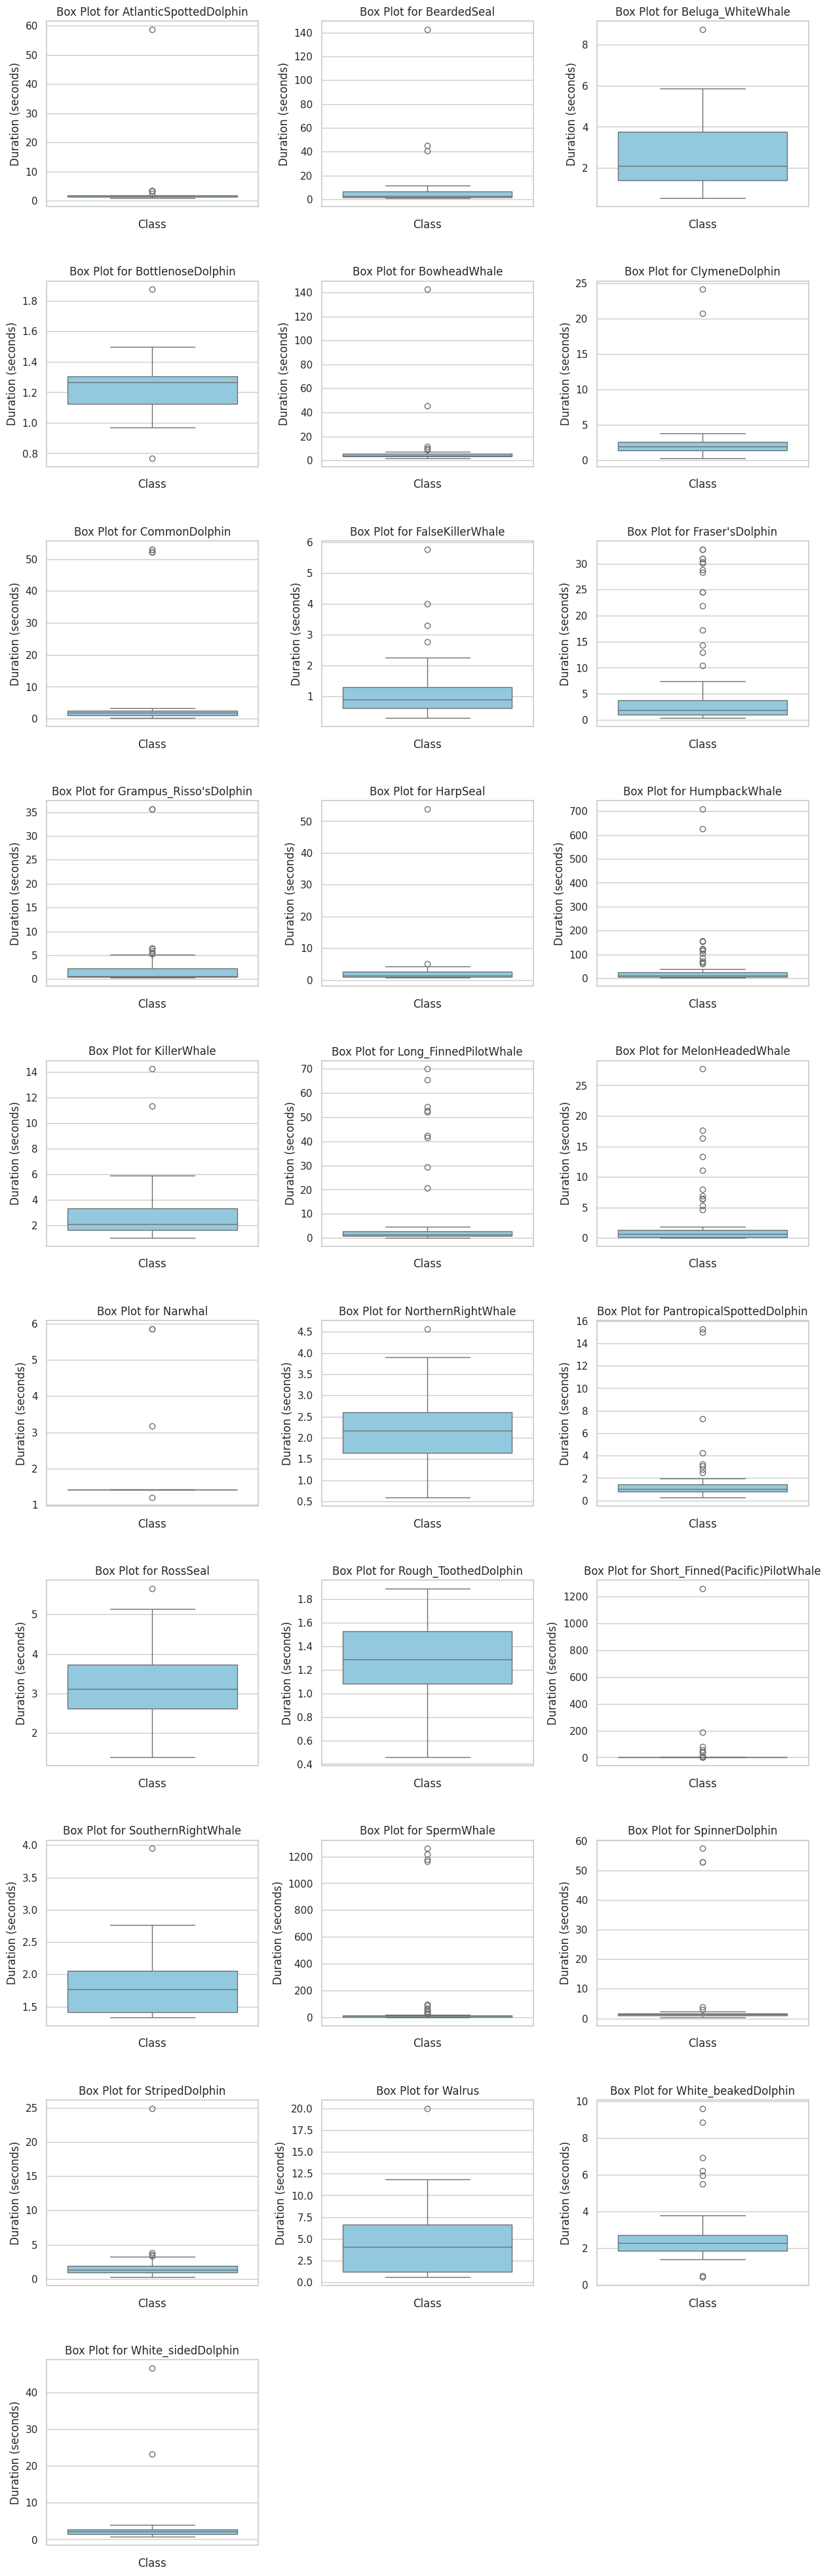

In [53]:
# Visualise data with histograms
import seaborn as sns

# Use a whitegrid
sns.set(style="whitegrid")

# Number of plots per row
plots_per_row = 3

# Calculate the number of required rows
num_classes = len(class_durations)
num_rows = (num_classes + plots_per_row - 1) // plots_per_row

# Set up the figure and axes
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))  # Adjust the figure size as needed
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust horizontal and vertical spacing

# Plot data
for idx, (class_name, durations) in enumerate(class_durations.items()):
    ax = axs[idx // plots_per_row, idx % plots_per_row]
    sns.boxplot(data=durations, color='skyblue', ax=ax)
    ax.set_title(f'Box Plot for {class_name}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Duration (seconds)')

# Hide any unused axes if the number of classes isn't a perfect multiple of plots_per_row
if num_classes % plots_per_row:
    for ax in axs.flatten()[num_classes:]:
        ax.set_visible(False)

plt.show()